In [51]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
homes = pd.read_csv('data/Zip_Zhvi_SingleFamilyResidence.csv')

In [6]:
homes.shape

(15360, 275)

In [4]:
homes.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1009200,1012200,1018100,1024500,1029400,1031600,1032400,1034400,1035400,1033600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,313800,315000,316700,319000,321300,322600,323300,324200,324400,323500
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320900,321200,322700,326400,330200,332500,334300,335800,336600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1290800,1295800,1299000,1305000,1310000,1311700,1313600,1316400,1314300,1309400
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120400,120400,120300,120400,120500,120700,121200,122100,122900,123300


In [21]:
# Auto generate years and months to use for analysis
years = range(2005, 2013)
months = range(1,13)
desired_dates = ['{y}-{m:02d}'.format(y=year, m=month) for year, month in itertools.product(years, months)]

In [22]:
# Get MoM growth
crash_homes = homes.loc[:, ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
                        'SizeRank'] + desired_dates ]

In [29]:
growth_dates = desired_dates[1:]
start_date = desired_dates[0]
for date in growth_dates:
    crash_homes.loc[:, date + '_growth'] = (( crash_homes[date] - crash_homes[start_date] ) / crash_homes[start_date]) * 100
    start_date = date 

In [45]:
monthly_growth = []
for date in growth_dates:
    """
    print(crash_homes.loc[crash_homes[date + '_growth'] == crash_homes[date + '_growth'].max(), 
                          ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
                           'SizeRank', date + '_growth']])
    """
    monthly_growth.append([ date, crash_homes[date + '_growth'].mean() ] )

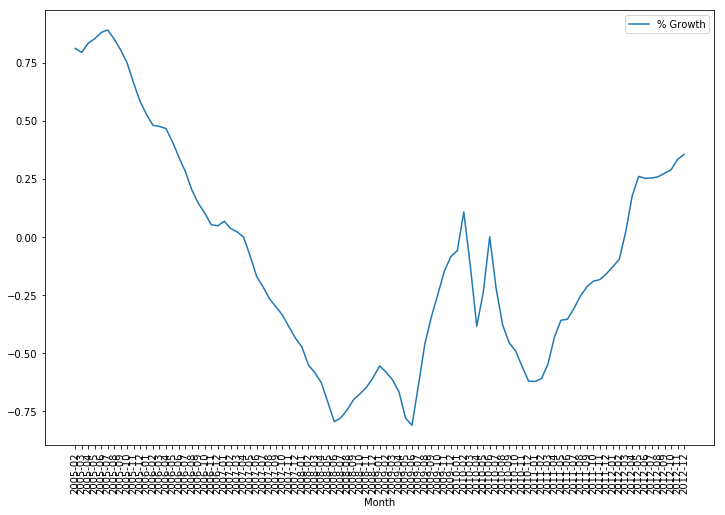

In [76]:
growth = pd.DataFrame(monthly_growth, columns=['Month', '% Growth'])
ax = growth.plot(x='Month', y='% Growth', xticks=growth.index, rot=90, figsize=(12, 8))
ax.set_xticklabels(growth['Month'])
plt.show()

array(['2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07',
       '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01',
       '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07',
       '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01',
       '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07',
       '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01',
       '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07',
       '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01',
       '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07',
       '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01',
       '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07',
       '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01',
       '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07',
       '2011-08', '2011-09', '2011-10', '2011-11', 